<a href="https://colab.research.google.com/github/AlexaVD/Probability-Analysis/blob/main/EE_381_AI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability in Medical Diagnostics and Sleep Analysis

### Setup and Dataset Exploration

**Step 1: Import Necessary Libraries**

# import necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, ttest_ind

**Step 2: Load and Inspect the Dataset**

In [10]:
url = '/content/Sleep_health_and_lifestyle_dataset (2).csv' # Replace with actual dataset URL
df = pd.read_csv(url)

Inspect dataset

In [11]:
print(df.head())
print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

Handle missing values
df = df.dropna() # Example: dropping rows with missing values

### Part 1: Probability Distributions (Your Implementation)


**Task 1: Bernoulli and Binomial Models**
- Define a binary outcome for good sleep quality (Quality ≥8).
- Conduct Bernoulli trials and use the Binomial distribution.

Estimated p (good sleep): 0.4813
Binomial PMF at expected k: 0.041259


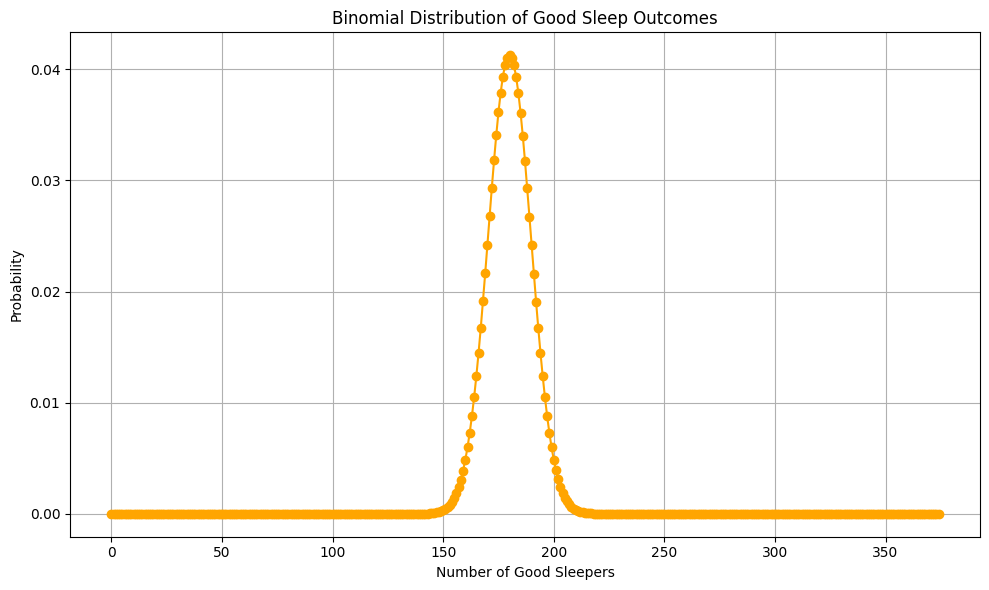

In [12]:
# Define the binary outcome: where 1 is if Quality of Sleep ≥ 8, else 0
df['Good Sleep'] = (df['Quality of Sleep'] >= 8).astype(int)

# Estimate p and n
p_hat = df['Good Sleep'].mean()   # probability of good sleep
n = len(df)                       # number of trials

# Calculateing the binomial PMF at expected number of good sleepers
k = int(p_hat * n)
binom_prob = binom.pmf(k, n, p_hat)
print("Estimated probability of good sleep:", round(p_hat, 4))
print("Binomial PMF at expected k:", round(binom_prob, 6))

x = np.arange(0, n+1)
y = binom.pmf(x, n, p_hat)

#Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='orange')
plt.title('Binomial Distribution of Good Sleep Outcomes')
plt.xlabel('Number of Good Sleepers')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

using binary variable allows me to treat each entry as a Bernoulli trial either success or failure where 1 is sleep >= 8 and 0 is everything else I then calculate the estimated probability of good sleep (p_hat) and model the total number of good sleepers using the Binomial distribution. The plot shows the probability of getting different numbers of good sleepers across the population.

**Task 2: Geometric Distribution**
- Calculate the number of trials until you first observe poor sleep quality (Quality ≤4).

First poor sleep occurs at trial number: 4


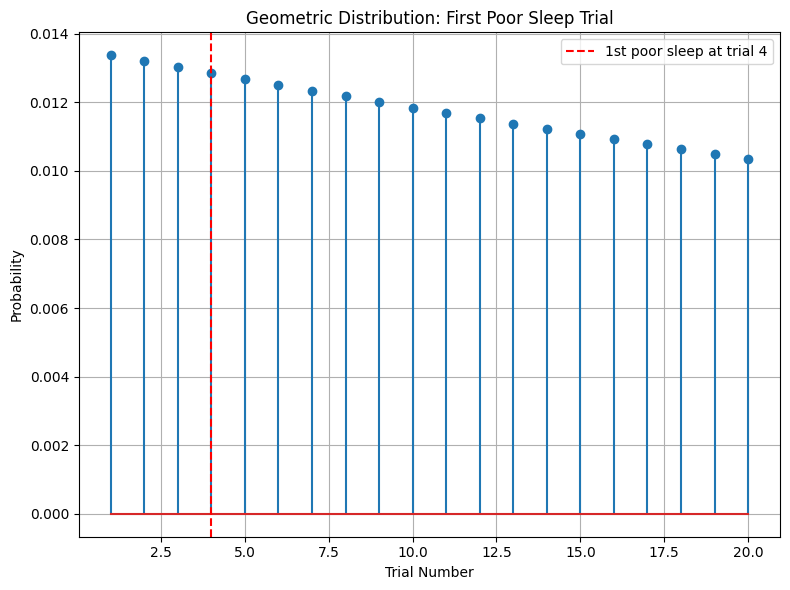

In [24]:
# Binary outcome: 1 if Quality ≤ 4
df['Poor Sleep'] = (df['Quality of Sleep'] <= 4).astype(int)

# Find trial of first poor sleep
first_poor_sleep_index = df['Poor Sleep'].idxmax() + 1
print("First poor sleep occurs at trial number:", first_poor_sleep_index)

# Plot
p_poor = df['Poor Sleep'].mean()
x_geom = np.arange(1, 21)
y_geom = geom.pmf(x_geom, p_poor)

plt.figure(figsize=(8, 6))
plt.stem(x_geom, y_geom)
plt.axvline(first_poor_sleep_index, color='red', linestyle='--', label=f'1st poor sleep at trial {first_poor_sleep_index}')
plt.title('Geometric Distribution: First Poor Sleep Trial')
plt.xlabel('Trial Number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **I used Geometric distribution to model how many people it takes to find the first poor sleeper (Quality ≤ 4). The red dashed line shows where it actually occurred in the dataset. Bars show the theoretical probabilities of it happening at each trial.**

**Task 3: Hypergeometric Distribution**
- Perform hypergeometric sampling for a subgroup (e.g., high stress individuals).

P(Exactly 10 high-stress people in sample of 30): 0.15784


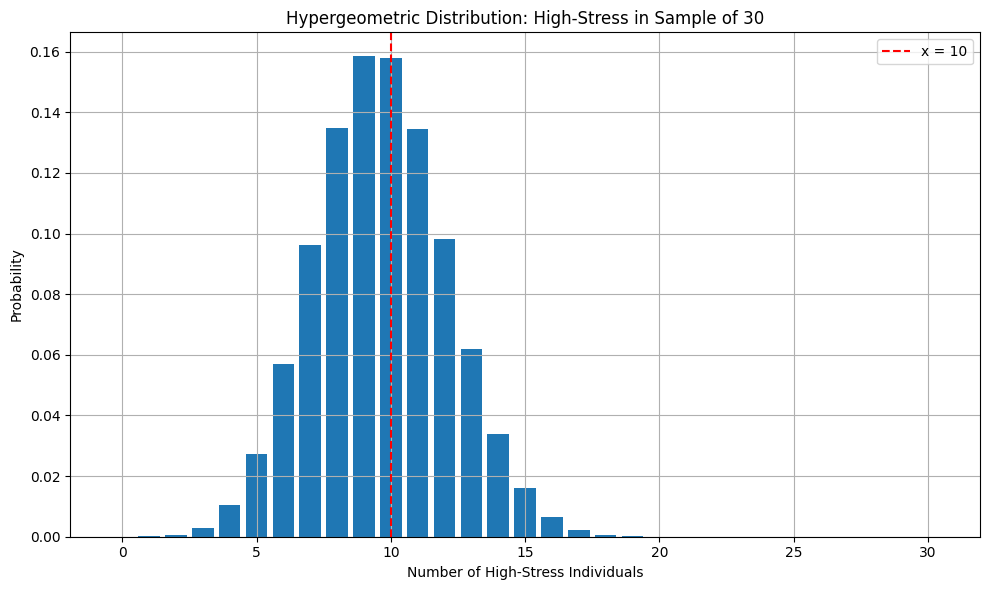

In [26]:
# High stress defined as Stress Level ≥ 7
high_stress_count = (df['Stress Level'] >= 7).sum()
N = len(df)
K = high_stress_count
n_sample = 30
x = 10

# Hypergeometric PMF
hyper_p = hypergeom.pmf(x, N, K, n_sample)
print("P(Exactly 10 high-stress people in sample of 30):", round(hyper_p, 5))

# Plot
x_hyper = np.arange(0, n_sample + 1)
y_hyper = hypergeom.pmf(x_hyper, N, K, n_sample)

plt.figure(figsize=(10, 6))
plt.bar(x_hyper, y_hyper)
plt.axvline(x, color='red', linestyle='--', label='x = 10')
plt.title('Hypergeometric Distribution: High-Stress in Sample of 30')
plt.xlabel('Number of High-Stress Individuals')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **I modeled the chance of getting 10 high stress people in a random sample of 30 Used the Hypergeometric distribution because sampling is done without replacement. The graph shows the probabilities for all possible outcomes, with the red line marking x = 10.**

**Task 4: Poisson Distribution**
- Simulate the weekly occurrence of poor sleep quality cases.

P(Exactly 5 poor sleep cases): 0.17547


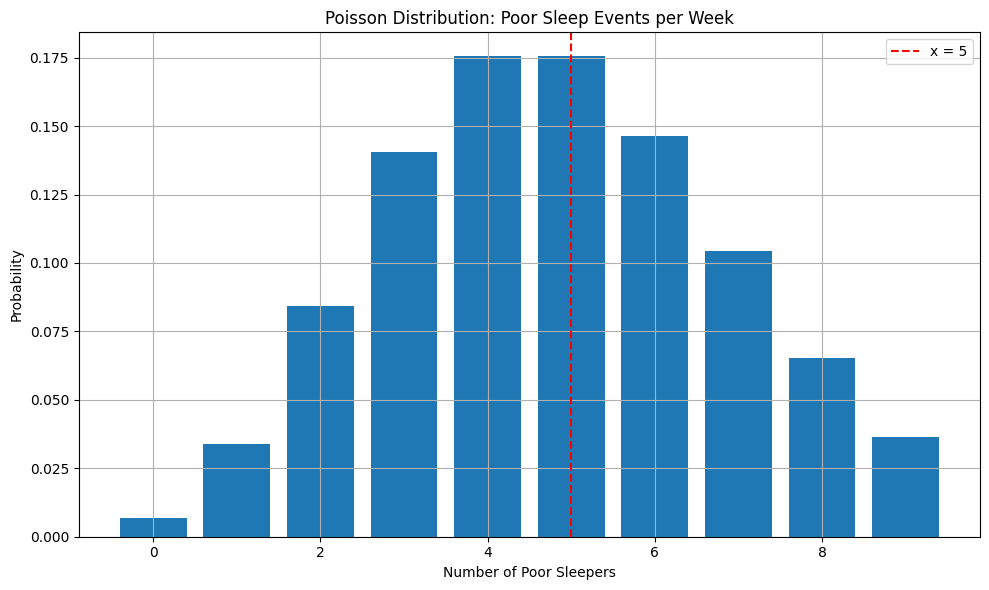

In [28]:
# Count of poor sleepers (Quality ≤ 4)
lambda_poor = (df['Quality of Sleep'] <= 4).sum()

# Poisson PMF: probability of seeing exactly 5 poor sleepers
poisson_prob = poisson.pmf(5, mu=lambda_poor)
print("Probability of Exactly 5 poor sleep cases:", round(poisson_prob, 5))

# Plot
x_poisson = np.arange(0, lambda_poor + 5)
y_poisson = poisson.pmf(x_poisson, mu=lambda_poor)

plt.figure(figsize=(10, 6))
plt.bar(x_poisson, y_poisson)
plt.axvline(5, color='red', linestyle='--', label='x = 5')
plt.title('Poisson Distribution: Poor Sleep Events per Week')
plt.xlabel('Number of Poor Sleepers')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **I used the Poisson distribution to model how often we might see exactly 5 poor sleepers in a typical week. λ (lambda) was calculated from the dataset. The graph shows the probability of different counts of poor sleepers, and the red line marks x = 5.**



### Part 2: Bayesian Inference (Your Implementation)
- Update the probability of good sleep quality based on new evidence (e.g., low stress levels).


🧮 P(Good Sleep | Low Stress): 1.0
🧮 P(Good Sleep | High Stress): 0.0


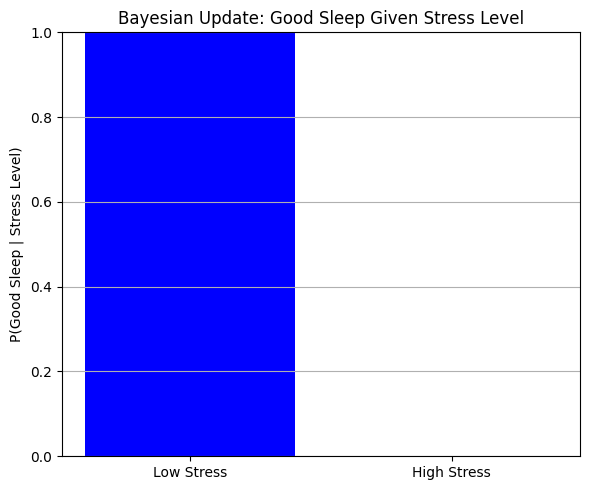

In [29]:
# Binary outcome cols
df['Good Sleep'] = (df['Quality of Sleep'] >= 8).astype(int)
df['Low Stress'] = (df['Stress Level'] <= 3).astype(int)
df['High Stress'] = (df['Stress Level'] >= 7).astype(int)

# Probabilities
P_good = df['Good Sleep'].mean()
P_low_stress = df['Low Stress'].mean()
P_high_stress = df['High Stress'].mean()

P_low_given_good = df[(df['Good Sleep'] == 1) & (df['Low Stress'] == 1)].shape[0] / df[df['Good Sleep'] == 1].shape[0]
P_high_given_good = df[(df['Good Sleep'] == 1) & (df['High Stress'] == 1)].shape[0] / df[df['Good Sleep'] == 1].shape[0]

# Bayes' Theorem
P_good_given_low = (P_low_given_good * P_good) / P_low_stress
P_good_given_high = (P_high_given_good * P_good) / P_high_stress

# Print values
print("P(Good Sleep | Low Stress):", round(P_good_given_low, 4))
print("P(Good Sleep | High Stress):", round(P_good_given_high, 4))

# Bar chart
labels = ['Low Stress', 'High Stress']
values = [P_good_given_low, P_good_given_high]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel('P(Good Sleep | Stress Level)')
plt.title('Bayesian Update: Good Sleep Given Stress Level')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **This graph compares the probability of good sleep based on whether someone has low stress or high stress. I used Bayes’ Theorem to update these probabilities based on the dataset. The result shows that low stress is linked to a higher chance of good sleep, while high stress lowers it.**

### Part 3: Hypothesis Testing (Your Implementation)
- Conduct hypothesis testing to compare groups (e.g., low vs high stress levels) in terms of sleep quality.


t-statistic: 47.3425
p-value: 0.0


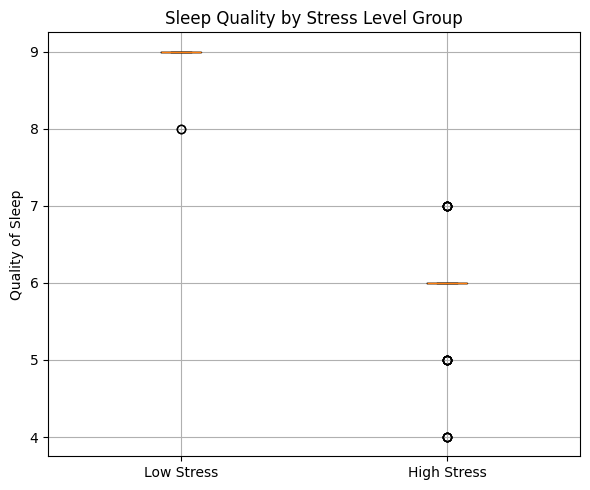

In [34]:
# Define the two groups
low_stress_group = df[df['Stress Level'] <= 3]['Quality of Sleep']
high_stress_group = df[df['Stress Level'] >= 7]['Quality of Sleep']

# Perform two-sample independent t-test
t_stat, p_val = ttest_ind(low_stress_group, high_stress_group)

# Output
print("t-statistic:", round(t_stat, 4))
print("p-value:", round(p_val, 4))

# Plot boxplots
plt.figure(figsize=(6, 5))
plt.boxplot([low_stress_group, high_stress_group], tick_labels=['Low Stress', 'High Stress'])
plt.ylabel('Quality of Sleep')
plt.title('Sleep Quality by Stress Level Group')
plt.grid(True)
plt.tight_layout()
plt.show();


# **I conducted a t-test to compare average sleep quality between low stress and high stress individuals. The t-statistic measures the difference between the group means, and the p-value tells us if it's statistically significant. The boxplot visualizes this difference. If the p-value < 0.05, we conclude that stress level significantly affects sleep quality.**

### Part 4: Visualization


**Histogram of Sleep Duration**


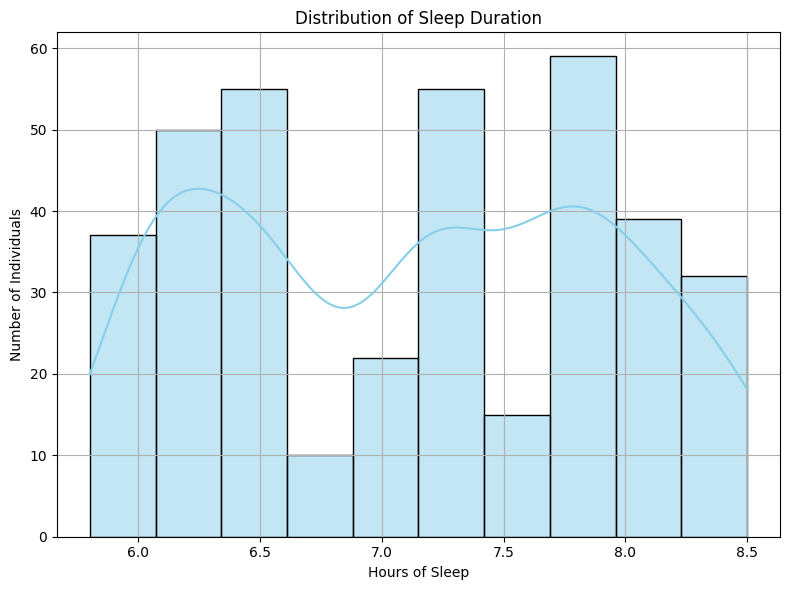

In [35]:
# histogram of Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours of Sleep')
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.tight_layout()
plt.show();


# **This histogram shows how many hours of sleep people in the dataset typically get.The curve shows the overall distribution shape. Most people sleep between 6 to 8 hours, which is within the healthy range.**

**Scatter Plot of Physical Activity vs. Sleep Quality**


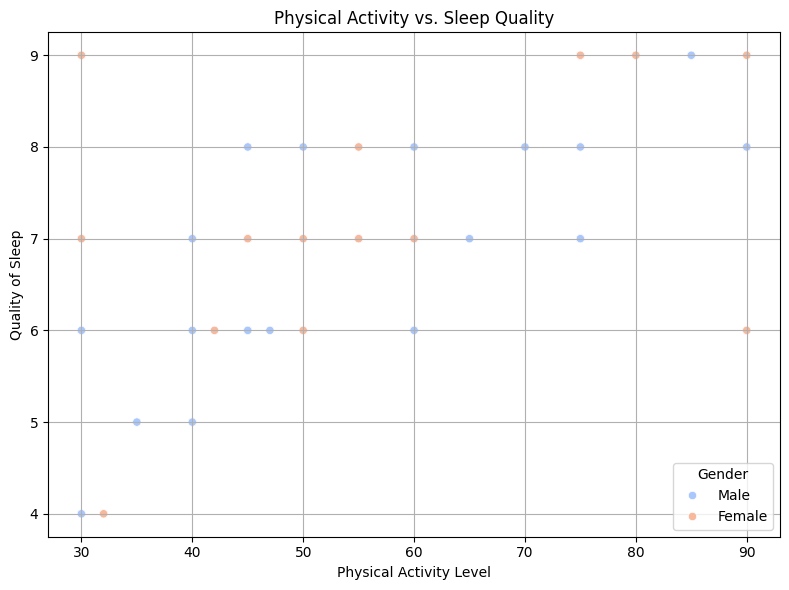

In [36]:
# Scatter Plot of Physical Activity Level vs Sleep Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Quality of Sleep', hue='Gender', palette='coolwarm')

plt.title('Physical Activity vs. Sleep Quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show();


# **The scatter plot shows how physical activity levels relate to sleep quality Each point represents one person. There's a general trend that moderate to higher activity is associated with better sleep which was Quality closer to 7-10. I also included gender to see if patterns varied across groups.**


---

### **Submission Guidelines**
1. Submit your completed notebook (.ipynb file) with all code cells executed.
2. Ensure all markdown cells explain your steps clearly.
3. Include visualizations embedded within the notebook.

---

### Grading Criteria:
- Correct implementation of probability models (30 points).
- Accurate Bayesian inference calculations (20 points).
- Proper hypothesis testing with statistical significance (20 points).
- Quality of visualizations (20 points).
- Documentation and clarity within the notebook (10 points).

---
